<a href="https://colab.research.google.com/github/rlaaudrb1104/Ai/blob/KMG/new_start_graph_no_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install accelerate -U
!pip install transformers[torch] -U
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 6.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [4]:
import pandas as pd

In [24]:
#df = pd.read_csv('/content/drive/MyDrive/Dataset/prototype5.csv')
df = pd.read_csv('/content/drive/MyDrive/Dataset/final/MSR+julite+Div_no_func.csv')

In [25]:
df

,Unnamed: 0,CWE ID,code,vul,lang,labels
0,0,CWE-119,isdn_net_hangup(struct net_device *d){ isdn_ne...,0,c,1
1,1,CWE-119,isdn_net_ciscohdlck_slarp_send_request(isdn_ne...,0,c,1
2,2,CWE-119,static __inline__ void isdn_net_device_stop_qu...,0,c,1
3,3,CWE-119,"isdn_net_new(char *name, struct net_device *ma...",0,c,1
4,4,CWE-119,isdn_net_rm(char *name){ u_long flags; isdn_ne...,0,c,1
...,...,...,...,...,...,...
16390,16390,CWE-415,void func()\n{\n wchar_t * data;\n \n ...,1,cpp,5
16391,16391,CWE-415,namespace func\n{\nfunc::func(wchar_t * dataCo...,1,cpp,5
16392,16392,CWE-415,namespace func\n{\nfunc::func(wchar_t * dataCo...,1,cpp,5
16393,16393,CWE-415,class func \n{\n public:\n func(cons...,1,cpp,5


In [26]:
df.loc[df['vul'] == 0, 'CWE ID'] = 'safe'

In [27]:
cwe_to_label = {
    'safe': 0,
    'CWE-119': 1,
    'CWE-20': 2,
    'CWE-125': 3,
    'CWE-787': 4,
    'CWE-415': 5,
    'CWE-399': 6,
    'CWE-416': 7,
    'CWE-476': 8,
    'CWE-190': 9
}
df['labels'] = df['CWE ID'].map(cwe_to_label)

In [28]:
df = df[['code','labels']]
df

,code,labels
0,isdn_net_hangup(struct net_device *d){ isdn_ne...,0
1,isdn_net_ciscohdlck_slarp_send_request(isdn_ne...,0
2,static __inline__ void isdn_net_device_stop_qu...,0
3,"isdn_net_new(char *name, struct net_device *ma...",0
4,isdn_net_rm(char *name){ u_long flags; isdn_ne...,0
...,...,...
16390,void func()\n{\n wchar_t * data;\n \n ...,5
16391,namespace func\n{\nfunc::func(wchar_t * dataCo...,5
16392,namespace func\n{\nfunc::func(wchar_t * dataCo...,5
16393,class func \n{\n public:\n func(cons...,5


In [29]:
import pandas as pd
import re
import transformers
from transformers import AutoModel, AutoTokenizer, AutoModelForSequenceClassification
from datasets import load_dataset
from pandas.core.common import random_state
import numpy as np
from datasets import load_metric
from transformers import TrainingArguments, Trainer
import logging
import sklearn.metrics as metric
from transformers import DataCollatorWithPadding
import torch,gc
from sklearn.metrics.pairwise import cosine_similarity
from torch.nn import CrossEntropyLoss
from transformers import AdamW
from transformers import RobertaForSequenceClassification, RobertaTokenizer, TrainingArguments, Trainer

In [30]:
model = AutoModelForSequenceClassification.from_pretrained("microsoft/graphcodebert-base", num_labels = 10)
tokenizer = AutoTokenizer.from_pretrained("microsoft/graphcodebert-base")
batch_size = 16
epoch_num = 1000
MAX_LEN = 512
learning_rate = 2e-5

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
import re

def preprocess(df, file_name):
    # 멀티 라인 주석 제거
    df['code'] = df['code'].replace(re.compile(r'/\*.*?\*/', re.DOTALL), "", regex=True)
    # 싱글 라인 주석 제거
    df['code'] = df['code'].replace(re.compile(r'//.*?\n'), "", regex=True)
    # angle brackets를 사용하는 include 제거
    df['code'] = df['code'].replace(re.compile(r'#include .*?\n'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'#include "*.*?\n'), "", regex=True)
    # 매크로 정의 제거
    df['code'] = df['code'].replace(re.compile(r'#define .*?\n'), "", regex=True)
    # 전처리 지시문 제거
    df['code'] = df['code'].replace(re.compile(r'#undef\s+\w+'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'#if\s+\w+'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'#else\s+\w+'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'#elif\s+\w+'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'#endif'), "", regex=True)
    # 탭과 여러 공백을 하나의 공백으로
    df['code'] = df['code'].replace(re.compile(r'[\t ]+'), " ", regex=True)
    # 여러 줄바꿈을 하나로
    df['code'] = df['code'].replace(re.compile(r'\n\s*\n'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'\n'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'return*.*?;'), "", regex=True)
    df['code'] = df['code'].replace(re.compile(r'return;'), "", regex=True)
    # void func 로 변경
    # df['code'] = df['code'].replace(re.compile(r'\b([a-zA-Z_]\w*)\s+([a-zA-Z_]\w*)\s*\(([^)]*)\)\s*{'), r"void func(\3){", regex=True)
    # 데이터프레임을 CSV 파일로 저장
    df.to_csv(file_name, index=False)
    return df  # 수정된 데이터프레임 반환

def tokenized(examples):
  return tokenizer(examples['code'], pad_to_max_length=True, max_length=MAX_LEN,truncation=True, return_token_type_ids=True)

In [32]:
preprocess(df,"preprocess.csv")
dataset = load_dataset("csv",data_files="preprocess.csv")['train']
encoded_dataset = dataset.map(tokenized,remove_columns=['code'],batched=True)

<ipython-input-31-53e3f007888a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['code'] = df['code'].replace(re.compile(r'/\*.*?\*/', re.DOTALL), "", regex=True)
<ipython-input-31-53e3f007888a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['code'] = df['code'].replace(re.compile(r'//.*?\n'), "", regex=True)
<ipython-input-31-53e3f007888a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/16395 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [33]:
dataset['code'][3]

'isdn_net_new(char *name, struct net_device *master){ isdn_net_dev *netdev; if (isdn_net_findif(name)) { printk(KERN_WARNING "isdn_net: interface %s already exists\\n", name); } if (name == NULL) if (!(netdev = kzalloc(sizeof(isdn_net_dev), GFP_KERNEL))) { printk(KERN_WARNING "isdn_net: Could not allocate net-device\\n"); } netdev->dev = alloc_netdev(sizeof(isdn_net_local), name, _isdn_setup); if (!netdev->dev) { printk(KERN_WARNING "isdn_net: Could not allocate network device\\n"); kfree(netdev); } netdev->local = netdev->dev->priv; netdev->dev->init = isdn_net_init; if (master) { struct net_device *p = (((isdn_net_local *) master->priv)->slave); struct net_device *q = master; netdev->local->master = master; while (p) { q = p; p = (((isdn_net_local *) p->priv)->slave); } ((isdn_net_local *) q->priv)->slave = netdev->dev; } else { netdev->dev->tx_timeout = isdn_net_tx_timeout; netdev->dev->watchdog_timeo = ISDN_NET_TX_TIMEOUT; if (register_netdev(netdev->dev) != 0) { printk(KERN_WARNIN

In [34]:
encoded_dataset = encoded_dataset.train_test_split(0.3,seed=100)

In [35]:
encoded_dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11476
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4919
    })
})

In [36]:
optimizer = torch.optim.AdamW(model.parameters(),
            lr = learning_rate, betas=(0.9,0.99), eps=1e-8,
            weight_decay=0.1)
scheduler = transformers.get_cosine_schedule_with_warmup(optimizer,
                                        num_warmup_steps=5, num_training_steps=5)
optimizers = optimizer, scheduler

In [37]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # 각 클래스에 대한 F1 스코어 계산
    f1_per_class = f1_score(labels, predictions, average=None, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    # 가중 평균, 매크로 평균, 마이크로 평균 F1 스코어 계산
    f1_weighted = f1_score(labels, predictions, average='weighted')
    f1_macro = f1_score(labels, predictions, average='macro')
    f1_micro = f1_score(labels, predictions, average='micro')
    recall_weighted = recall_score(labels, predictions, average='weighted')
    accuracy = accuracy_score(labels, predictions)

    # 결과를 딕셔너리 형태로 저장
    metrics = {
        'accuracy': accuracy,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
    }

    # 클래스별 F1 스코어를 딕셔너리에 추가
    for i, f1 in enumerate(f1_per_class):
        metrics[f'f1_class_{i}'] = f1

    return metrics

In [39]:
# 전역 변수로 incorrect_samples 초기화
incorrect_samples = []
from transformers import TrainerCallback
class CustomTrainerCallback(TrainerCallback):
    def __init__(self, trainer, eval_dataset, early_stopping_patience=5):
        super().__init__()
        self.trainer = trainer
        self.eval_dataset = eval_dataset
        self.early_stopping_patience = early_stopping_patience
        self.best_loss = float('inf')
        self.patience_counter = 0
        global incorrect_samples
        self.incorrect_samples = []

    def on_evaluate(self, args, state, control, **kwargs):
        global incorrect_samples
        eval_loss = kwargs.get('metrics', {}).get('eval_loss')
        if eval_loss is not None:
            if eval_loss < self.best_loss:
                self.best_loss = eval_loss
                self.patience_counter = 0
            else:
                self.patience_counter += 1

            if self.patience_counter >= self.early_stopping_patience:
                print(f"No improvement in {self.early_stopping_patience} evaluations without improvement.")
                control.should_training_stop = True

        eval_dataloader = self.trainer.get_eval_dataloader(self.eval_dataset)
        self.trainer.model.eval()
        for batch in eval_dataloader:
            batch = {k: v.to(self.trainer.args.device) for k, v in batch.items()}
            with torch.no_grad():
                outputs = self.trainer.model(**batch)
                predictions = torch.argmax(outputs.logits, dim=-1)
                labels = batch['labels']
                incorrect_mask = predictions != labels

                if incorrect_mask.any():
                    incorrect_batch_samples = {k: v[incorrect_mask].cpu().numpy() for k, v in batch.items()}
                    # 여기서는 추가 토크나이징이나 패딩을 하지 않고 바로 저장
                    incorrect_samples.append(incorrect_batch_samples)



In [40]:
# TrainingArguments 설정
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1000,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    evaluation_strategy="steps",
    eval_steps=500,
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='loss'
)

# 트레이너 초기화 및 사용자 정의 콜백 추가

# 콜백 인스턴스 생성 및 트레이너 초기화

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['test'],
    compute_metrics=compute_metrics
)


In [41]:
callback = CustomTrainerCallback(trainer, encoded_dataset['test'], 5)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['test'],
    compute_metrics=compute_metrics,
    callbacks=[callback]
)

In [42]:
gc.collect()
torch.cuda.empty_cache()

In [43]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,Recall Weighted,F1 Weighted,F1 Macro,F1 Micro,F1 Class 0,F1 Class 1,F1 Class 2,F1 Class 3,F1 Class 4,F1 Class 5,F1 Class 6,F1 Class 7,F1 Class 8,F1 Class 9
500,1.824400,1.405003,0.519211,0.519211,0.483519,0.425426,0.519211,0.714111,0.445070,0.428177,0.483960,0.499405,0.881491,0.103261,0.371171,0.014184,0.313433
1000,1.192600,1.162500,0.625940,0.625940,0.624769,0.593128,0.625940,0.851108,0.554054,0.519111,0.544828,0.581921,0.918648,0.483607,0.470016,0.424658,0.583333
1500,0.941900,1.014731,0.698109,0.698109,0.691159,0.661966,0.698109,0.863722,0.667715,0.595604,0.633682,0.632911,0.894207,0.654206,0.572008,0.508264,0.597345
2000,0.650800,0.964645,0.723928,0.723928,0.718892,0.694894,0.723928,0.867323,0.679518,0.663424,0.661710,0.655427,0.906667,0.716157,0.636042,0.525667,0.637002
2500,0.473800,1.058239,0.733076,0.733076,0.731170,0.707231,0.733076,0.875438,0.692060,0.671937,0.690843,0.637647,0.929095,0.727554,0.670103,0.578834,0.598802
3000,0.400400,1.082030,0.737142,0.737142,0.736804,0.716106,0.737142,0.888774,0.673237,0.691800,0.692070,0.672037,0.931540,0.680798,0.654952,0.592920,0.682927
3500,0.319000,1.083647,0.740598,0.740598,0.739079,0.719515,0.740598,0.875728,0.692888,0.697531,0.675849,0.663403,0.927070,0.728758,0.659306,0.606383,0.668235
4000,0.261800,1.307263,0.739175,0.739175,0.737657,0.714582,0.739175,0.866730,0.691565,0.717637,0.698507,0.659232,0.926471,0.724638,0.694158,0.542424,0.624454
4500,0.252700,1.266720,0.747306,0.747306,0.747337,0.730505,0.747306,0.890843,0.688448,0.734797,0.645267,0.655126,0.922342,0.739130,0.710963,0.611321,0.706806


No improvement in 5 evaluations without improvement.


TrainOutput(global_step=4500, training_loss=0.7019275190565322, metrics={'train_runtime': 5329.4547, 'train_samples_per_second': 2153.316, 'train_steps_per_second': 134.723, 'total_flos': 1.892641135317811e+16, 'train_loss': 0.7019275190565322, 'epoch': 6.2674094707520895})

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


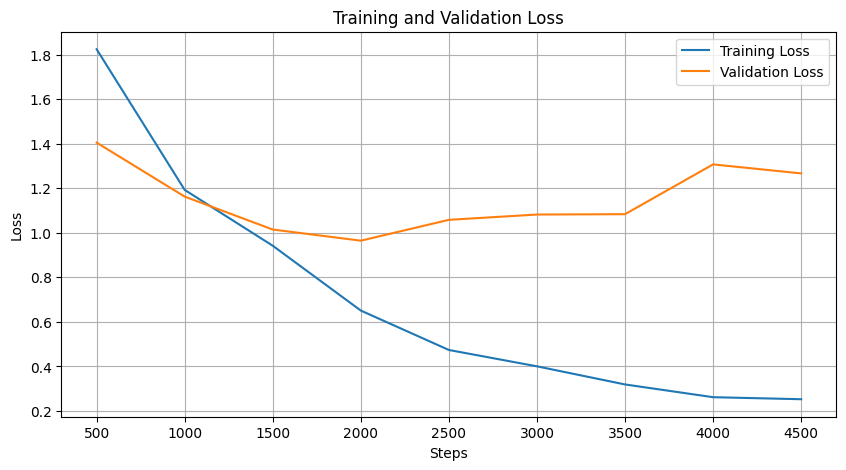

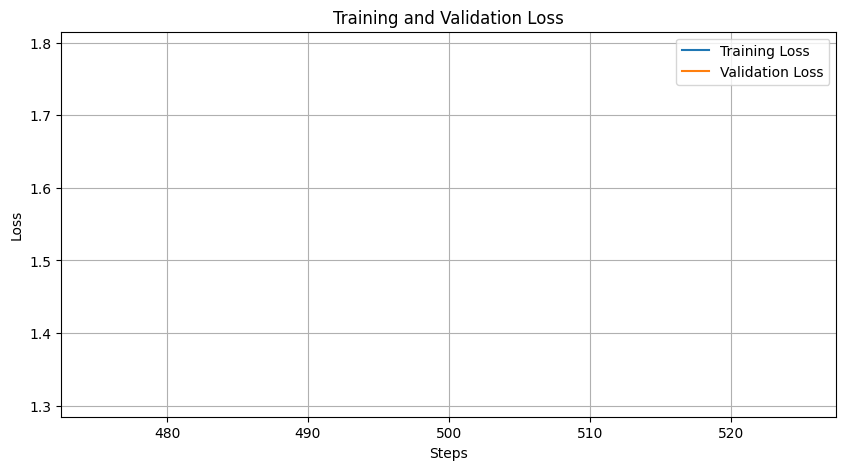

In [44]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

def plot_training_loss(log_dir):
    event_files = [os.path.join(log_dir, f) for f in os.listdir(log_dir) if 'events' in f]
    if not event_files:
        raise ValueError("No event files found in log directory.")

    for event_file in event_files:
        losses = {'Step': [], 'Training Loss': [], 'Validation Loss': []}
        for e in tf.compat.v1.train.summary_iterator(event_file):
            for v in e.summary.value:
                if v.tag == 'train/loss':
                    losses['Training Loss'].append(v.simple_value)
                    losses['Step'].append(e.step)
                elif v.tag == 'eval/loss':
                    losses['Validation Loss'].append(v.simple_value)

        if losses['Step']:
            df = pd.DataFrame(losses).set_index('Step')
            plt.figure(figsize=(10, 5))
            plt.plot(df['Training Loss'], label='Training Loss')
            plt.plot(df['Validation Loss'], label='Validation Loss')
            plt.xlabel('Steps')
            plt.ylabel('Loss')
            plt.title('Training and Validation Loss')
            plt.legend()
            plt.grid(True)
            plt.show()

# 로그 디렉토리를 지정하여 그래프 그리기
plot_training_loss('./logs')

In [ ]:
trainer.save_model('/content/drive/MyDrive/models/graphcodebert4')

In [ ]:
incorrect_samples

[{'labels': array([8, 0, 2, 2, 4, 2, 0, 7, 6, 4, 6, 9, 5, 2, 4, 2, 4, 0, 7, 1, 9, 9,
         1, 3, 7, 0, 8, 2, 4]),
  'input_ids': array([[    0, 47908, 26437, ...,     1,     1,     1],
         [    0, 47908, 26437, ...,     1,     1,     1],
         [    0, 47908, 26437, ...,     1,     1,     1],
         ...,
         [    0, 47908, 26437, ..., 10759, 12925,     2],
         [    0, 47908, 26437, ...,     1,     1,     1],
         [    0, 47908, 26437, ...,     1,     1,     1]]),
  'token_type_ids': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]),
  'attention_mask': array([[1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0]])},
 {'labels': array([3, 7, 2, 3

In [ ]:
first_sample = incorrect_samples[0]
print(first_sample['labels'])
print(type(first_sample['labels']))
incorrect_samples[0]

[8 0 2 2 4 2 0 7 6 4 6 9 5 2 4 2 4 0 7 1 9 9 1 3 7 0 8 2 4]
<class 'numpy.ndarray'>


{'labels': array([8, 0, 2, 2, 4, 2, 0, 7, 6, 4, 6, 9, 5, 2, 4, 2, 4, 0, 7, 1, 9, 9,
        1, 3, 7, 0, 8, 2, 4]),
 'input_ids': array([[    0, 47908, 26437, ...,     1,     1,     1],
        [    0, 47908, 26437, ...,     1,     1,     1],
        [    0, 47908, 26437, ...,     1,     1,     1],
        ...,
        [    0, 47908, 26437, ..., 10759, 12925,     2],
        [    0, 47908, 26437, ...,     1,     1,     1],
        [    0, 47908, 26437, ...,     1,     1,     1]]),
 'token_type_ids': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'attention_mask': array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]])}

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pad_sequence

import torch
from torch.utils.data import Dataset

class IncorrectSamplesDataset(Dataset):
    def __init__(self, samples):
        self.samples = samples  # samples는 딕셔너리 형태입니다.

    def __len__(self):
        return len(self.samples)  # labels의 길이를 반환합니다.

    def __getitem__(self, idx):
        # 각 키에 대해 해당 인덱스의 데이터를 추출하고 텐서로 변환합니다.
        return {
            'input_ids': torch.tensor(self.samples['input_ids'][idx], dtype=torch.long),
            'attention_mask': torch.tensor(self.samples['attention_mask'][idx], dtype=torch.long),
            'token_type_ids': torch.tensor(self.samples['token_type_ids'][idx], dtype=torch.long),
            'labels': torch.tensor(self.samples['labels'][idx], dtype=torch.long)
        }




def collate_fn(batch):
    input_ids = pad_sequence([item['input_ids'] for item in batch], batch_first=True, padding_value=0)
    attention_mask = pad_sequence([item['attention_mask'] for item in batch], batch_first=True, padding_value=0)
    labels = torch.stack([item['labels'] for item in batch])

    # token_type_ids가 모든 데이터에 포함되어 있는 경우에만 처리
    token_type_ids = None
    if 'token_type_ids' in batch[0]:
        token_type_ids = pad_sequence([item['token_type_ids'] for item in batch], batch_first=True, padding_value=0)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'token_type_ids': token_type_ids,
        'labels': labels
    }



In [ ]:
# 데이터셋 인스턴스 생성
incorrect_dataset = IncorrectSamplesDataset(incorrect_samples)

# 데이터셋 정보 출력
print(incorrect_dataset)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors='pt')

In [ ]:
from transformers import TrainingArguments, Trainer

# 데이터셋 인스턴스 생성
incorrect_dataset = IncorrectSamplesDataset(incorrect_samples)

# TrainingArguments 설정
training_args = TrainingArguments(
    output_dir='./results',     # 모델과 체크포인트 저장 경로
    evaluation_strategy="steps",
    eval_steps=50,              # 평가 주기 설정
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    num_train_epochs=3,         # 재학습할 에폭 수
    weight_decay=0.01
)

# Trainer 인스턴스 생성
trainer = Trainer(
    model=model,                # 재학습할 모델
    args=training_args,
    train_dataset=incorrect_dataset,  # 재학습을 위한 데이터셋
    eval_dataset=encoded_dataset['test'], # 평가를 위한 데이터셋
    compute_metrics=compute_metrics,
    data_collator=collate_fn
)


In [ ]:
trainer.train()

TypeError: list indices must be integers or slices, not str

In [ ]:
eval_results = trainer.evaluate()
print("Evaluation results:", eval_results)

In [ ]:
import pandas as pd

df2 = pd.read_csv("/content/drive/MyDrive/Dataset/final/Last_test.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset/final/Last_test.csv'

In [ ]:
df2 = df2[['labels', 'code']]

NameError: name 'df2' is not defined

In [ ]:
df2

NameError: name 'df2' is not defined

In [ ]:
import re

def preprocess2(df2, file_name):
    # 멀티 라인 주석 제거
    df2['code'] = df2['code'].replace(re.compile(r'/\*.*?\*/', re.DOTALL), "", regex=True)
    # 싱글 라인 주석 제거
    df2['code'] = df2['code'].replace(re.compile(r'//.*?\n'), "", regex=True)
    # angle brackets를 사용하는 include 제거
    df2['code'] = df2['code'].replace(re.compile(r'#include .*?\n'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'#include "*.*?\n'), "", regex=True)
    # 매크로 정의 제거
    df2['code'] = df2['code'].replace(re.compile(r'#define .*?\n'), "", regex=True)
    # 전처리 지시문 제거
    df2['code'] = df2['code'].replace(re.compile(r'#undef\s+\w+'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'#if\s+\w+'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'#else\s+\w+'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'#elif\s+\w+'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'#endif'), "", regex=True)
    # 탭과 여러 공백을 하나의 공백으로
    df2['code'] = df2['code'].replace(re.compile(r'[\t ]+'), " ", regex=True)
    # 여러 줄바꿈을 하나로
    df2['code'] = df2['code'].replace(re.compile(r'\n\s*\n'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'\n'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'return*.*?;'), "", regex=True)
    df2['code'] = df2['code'].replace(re.compile(r'return;'), "", regex=True)
    # void func 로 변경
    df2['code'] = df2['code'].replace(re.compile(r'\b([a-zA-Z_]\w*)\s+([a-zA-Z_]\w*)\s*\(([^)]*)\)\s*{'), r"void func(\3){", regex=True)
    # 데이터프레임을 CSV 파일로 저장
    df2.to_csv(file_name, index=False)
    return df2  # 수정된 데이터프레임 반환


def tokenized(examples):
  return tokenizer(examples['code'], pad_to_max_length=True, max_length=MAX_LEN,truncation=True, return_token_type_ids=True)

In [ ]:
preprocess2(df2,"preprocess2.csv")
dataset = load_dataset("csv",data_files="preprocess2.csv")['train']
encoded_dataset2 = dataset.map(tokenized,remove_columns=['code'],batched=True)

NameError: name 'df2' is not defined

In [ ]:
df3 = pd.read_csv("/content/preprocess2.csv")

In [ ]:
encoded_dataset2

Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 110
})

In [ ]:
trainer.predict(encoded_dataset['test'])

PredictionOutput(predictions=array([[ 0.02742812, -0.39351386,  0.0540446 , ..., -0.10310733,
         0.17207724,  0.03516811],
       [ 0.1255419 , -0.32383606,  0.14054807, ..., -0.015842  ,
         0.07655281, -0.02318546],
       [ 0.16482355, -0.26796117,  0.07672805, ..., -0.00980937,
         0.31677282,  0.00193137],
       ...,
       [ 0.15172961, -0.3624328 ,  0.0224196 , ..., -0.0870866 ,
         0.28315598,  0.01673019],
       [ 0.09528061, -0.35663185,  0.06933878, ..., -0.05413456,
         0.16247916,  0.05344477],
       [ 0.09994929, -0.32379842,  0.04181524, ..., -0.06413194,
         0.15221582, -0.02132664]], dtype=float32), label_ids=array([5, 1, 0, ..., 0, 2, 5]), metrics={'test_loss': 2.405827045440674, 'test_accuracy': 0.06340057636887608, 'test_recall_weighted': 0.06340057636887608, 'test_f1_weighted': 0.024242515105402596, 'test_f1_macro': 0.021271469488643415, 'test_f1_micro': 0.06340057636887608, 'test_f1_class_0': 0.09350237717908082, 'test_f1_class_1'